# Color Identificaion
Problem statment :
Interns are expected to create a TensorFlow model for identification of color. Your code will be given an image as an input and the code is supposed to categorize which RGB clour it matches to.

# Data set Creation 

In [1]:
import cv2
import numpy as np
import os

#Specify fix Image size 
height, width = 48, 48
blank_image = np.zeros((height, width, 3), np.uint8)

def create_img(i):
    n=0
    counter=0  #image label counter 
    for r in range(100, 255, 5):
        for g in range(20,80,10):
            for b in range(20,80,10):
                #opencv imread read image in b,g,r formate
                if i == 0:
                    blank_image[:, 0:width] = (b, g, r)
                    x="red"
                elif i == 1:
                    #consider r value as b
                    blank_image[:, 0:width] = (r, b, g)
                    x="blue"
                else:
                    #consider r value as g
                    blank_image[:, 0:width] = (g, r, b)
                    x="green"
                    
                # divide dataset into train and test data in 80:20 
                if n < 8:
                    n+=1
                    data_path="train/" + x +"//"
                elif n == 8:
                    n+=1
                    data_path="valid/" + x +"//"
                elif n == 9:
                    n+=1
                    data_path="test/" + x +"//"
                else:
                    data_path="train/" + x +"//"
                    n=0
                        
                if not os.path.exists(data_path):
                    os.makedirs(data_path)
                path_image = data_path + x + "_" + str(counter) + '.jpg'
                cv2.imwrite(path_image, blank_image)
                counter +=1

                
if not (os.path.exists('train//') and os.path.exists('test//') and os.path.exists('valid//')) :
    print ("DataSet is creating....")
    for i in range(0,3):
        create_img(i)
    print("ready")
else :
    print ("DataSet already exist")


DataSet already exist


# Import Libraries


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
import cv2
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.1.0


# Plot Sample Images

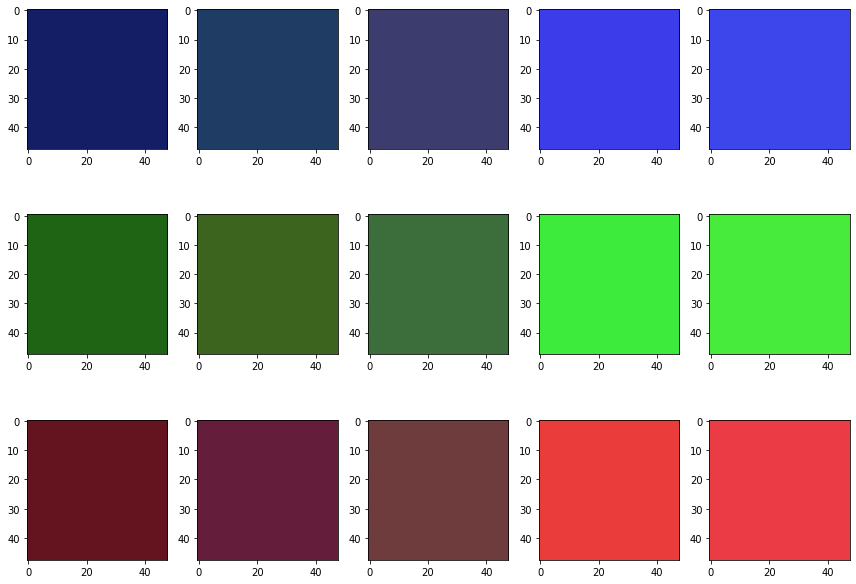

In [3]:
utils.datasets.fer.plot_example_images(plt).show()


# Size of Each Dataset(Train,Test,Validation)

In [4]:
print("Train Data")
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")
print("\n\nTest Data")
for expression in os.listdir("test/"):
    print(str(len(os.listdir("test/" + expression))) + " " + expression + " images")
print("\n\nValid Data")
for expression in os.listdir("valid/"):
    print(str(len(os.listdir("valid/" + expression))) + " " + expression + " images")


Train Data
914 blue images
914 green images
914 red images


Test Data
101 blue images
101 green images
101 red images


Valid Data
101 blue images
101 green images
101 red images


# Generating training and Validation batch

In [43]:
img_size = 48
batch_size = 32


#Train Data Generator

datagen_train = ImageDataGenerator(brightness_range=[0.2,1.0])
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)


#Validation Data Generator

datagen_validation = ImageDataGenerator(brightness_range=[0.2,1.0])
validation_generator = datagen_validation.flow_from_directory("valid/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
#Test Data Generator 
datagen_test = ImageDataGenerator(brightness_range=[0.2,1.0])
test_generator = datagen_test.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 2742 images belonging to 3 classes.
Found 303 images belonging to 3 classes.
Found 303 images belonging to 3 classes.


# Conventional Neural Network model

In [45]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32,(3,3), padding='same', input_shape=(48, 48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
activation_22 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 64)       

# Train Model 

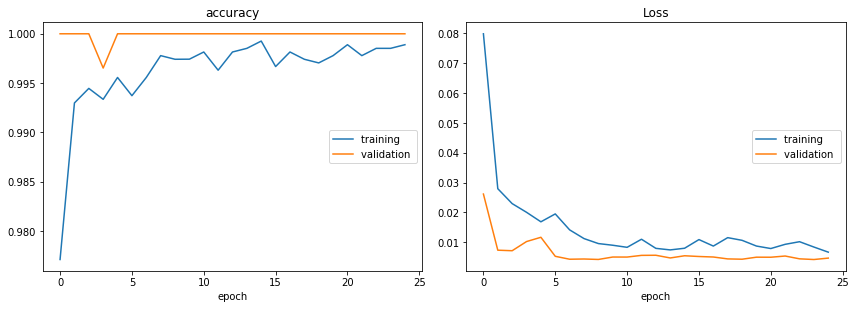

accuracy
	training         	 (min:    0.977, max:    0.999, cur:    0.999)
	validation       	 (min:    0.997, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.007, max:    0.080, cur:    0.007)
	validation       	 (min:    0.004, max:    0.026, cur:    0.005)

Epoch 00025: saving model to checkpoint_model_weight.h5
85/85 [==============================] - 35s 416ms/step - loss: 0.0067 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 1.0000
Wall time: 12min 32s


In [46]:
%%time

epochs = 25
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("checkpoint_model_weight.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

# Test  Model

  ...
    to  
  ['...']
9/9 [==============================] - 0s 55ms/step - loss: 0.0047 - accuracy: 1.0000


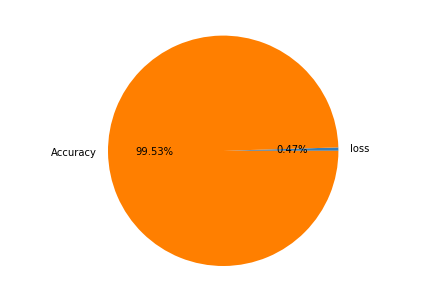

Test loss: 0.004717703727591369
Test accuracy: 1.0


In [47]:
from matplotlib import cm
test_steps = test_generator.n//test_generator.batch_size 

score_loss, score_accuracy = model.evaluate(
    x=test_generator,
    steps=test_steps,
)
#Representing Data using Matplotlib
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
color_Loss=cm.Set1(0.18) 
color_accuracy =cm.Set1(0.5) 
Color = [color_Loss,color_accuracy]
Label = ['loss', 'Accuracy']
Value = [score_loss,score_accuracy]
ax.pie(Value, labels = Label,autopct='%1.2f%%',colors =Color)
plt.show()

print('Test loss:', score_loss)
print('Test accuracy:', score_accuracy)

# Save model

In [48]:
model.save('model.h5')    

In [49]:
from tensorflow.keras.models import load_model 
model_path = 'model.h5'

def Model_load():
    if os.path.exists(model_path):
        print("Model is Loading...")
        model = load_model(model_path)
        print("Model is loaded sucessfully !")
    else:
        print("Model is ready")

    return model
Model_load()

Model is Loading...
Model is loaded sucessfully !


# Prediction of Color

In [52]:
 
def Prediction_Image_Creation(r,g,b):
    #Specify fix Image size 
    height, width = 48, 48
    blank_image = np.zeros((height, width, 3), np.uint8)
    #image generated using formate (B,G,R)
    blank_image[:, 0:width] = (b , g, r)
    path_image ='Prediction.jpg'
    cv2.imwrite(path_image, blank_image)
    return path_image
Prediction_Image_Creation(0,100,0)



'Prediction.jpg'

In [53]:
model =Model_load()

def color_prediction(prediction_image,model):
    
    image = cv2.imread(prediction_image)
    image = cv2.resize(image, (48, 48 ))
    result = np.expand_dims(image, axis=0)
    prediction_value=model.predict_classes(result)
    #1=green ,2=blue,0=red
    prediction_value_result = ['red','green','blue']
    color=prediction_value_result[int(prediction_value)]
    return color
    
color_prediction('Prediction.jpg',model)

Model is Loading...
Model is loaded sucessfully !


'green'

# Random Image Testing

In [54]:
# if import error raise
#import os 
base ="Input/"
Fault_prediction=0
model = Model_load()
# Accessing  image from input folder, before accssesing be sure that you unzip folder or system will atomatically generated
if not os.path.exists('Input'):
    print("Wait DataSet is loading ")
    %run Input.ipynb
    print("Dataset is ready")
    

Input = os.listdir(base)
total = len(Input)
for Custome_Image in Input:
        Actual_color_name=Custome_Image.split('_')[0]
        prediction_color=color_prediction(base+Custome_Image,model)
        if   Actual_color_name != prediction_color:
            Fault_prediction +=1
        print("\n\n Image:",Custome_Image, "\n Predicted_color: ",prediction_color,"\n Actual_color: ",Actual_color_name)


Model is Loading...
Model is loaded sucessfully !


 Image: blue_1.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_2.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_3.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_4.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_5.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_6.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_7.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_8.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: blue_9.jpg 
 Predicted_color:  blue 
 Actual_color:  blue


 Image: green_1.jpg 
 Predicted_color:  blue 
 Actual_color:  green


 Image: green_2.jpg 
 Predicted_color:  green 
 Actual_color:  green


 Image: green_3.jpg 
 Predicted_color:  green 
 Actual_color:  green


 Image: green_4.jpg 
 Predicted_color:  green 
 Actual_color:  green


 Image: green_5.jpg 
 Predicted_color:  green 
 Actua

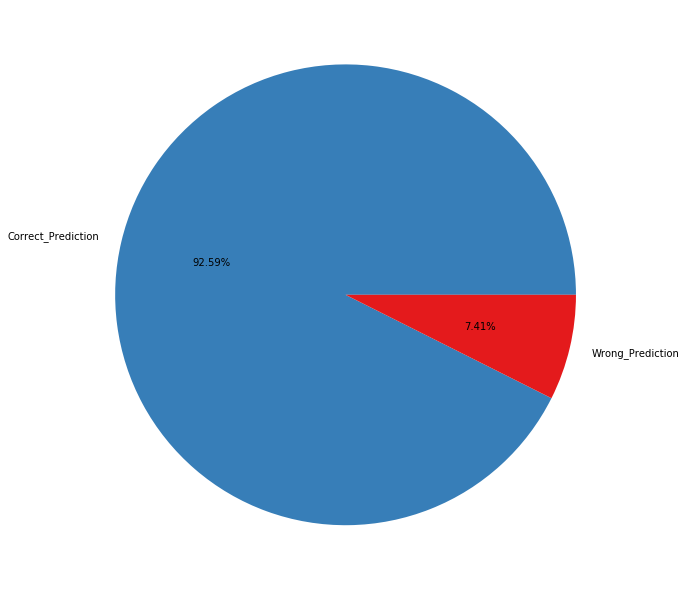

In [55]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
color_Loss=cm.Set1(0.18) 
color_accuracy =cm.Set1(0.075) 
Color = [color_Loss,color_accuracy]
Label = ['Correct_Prediction', 'Wrong_Prediction']
Value = [total-Fault_prediction,Fault_prediction]
ax.pie(Value, labels = Label,autopct='%1.2f%%',colors =Color)
plt.show()

According value Color is Red 
According to Model output is :


'red'

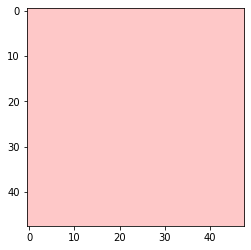

In [67]:
import matplotlib.image as mpimg

PREDICT_IMG=Prediction_Image_Creation(255,200,200)
img = mpimg.imread(PREDICT_IMG)
plt.imshow(img)
print("According value Color is Red \nAccording to Model output is :")
color_prediction("Prediction.jpg",model)

According value Color is Red 
According to Model output is :


'red'

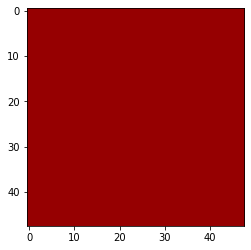

In [69]:
PREDICT_IMG=Prediction_Image_Creation(150,0,0)
img = mpimg.imread(PREDICT_IMG)
plt.imshow(img)
print("According value Color is Red \nAccording to Model output is :")
color_prediction("Prediction.jpg",model)

According value Color is blue 
According to Model output is :


'blue'

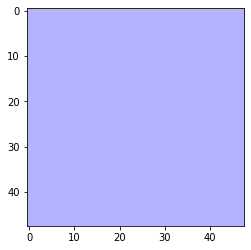

In [59]:
Prediction_Image_Creation(179,179,255)
img = mpimg.imread(PREDICT_IMG)
plt.imshow(img)
print("According value Color is blue \nAccording to Model output is :")
color_prediction("Prediction.jpg",model)

According value Color is blue 
According to Model output is :


'blue'

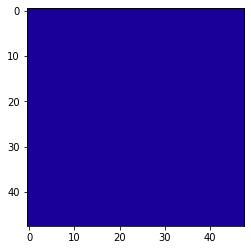

In [60]:
PREDICT_IMG=Prediction_Image_Creation(26,0,153)
img = mpimg.imread(PREDICT_IMG)
plt.imshow(img)
print("According value Color is blue \nAccording to Model output is :")
color_prediction("Prediction.jpg",model)

According value Color is blue 
According to Model output is :


'green'

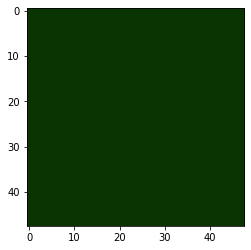

In [61]:
PREDICT_IMG=Prediction_Image_Creation(9,51,0)
img = mpimg.imread(PREDICT_IMG)
plt.imshow(img)
print("According value Color is blue \nAccording to Model output is :")
color_prediction("Prediction.jpg",model)

According value Color is blue 
According to Model output is :


'green'

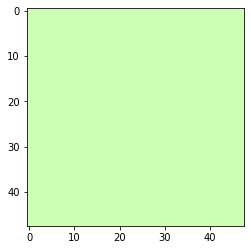

In [62]:
PREDICT_IMG=Prediction_Image_Creation(204,255,179)
img = mpimg.imread(PREDICT_IMG)
plt.imshow(img)
print("According value Color is blue \nAccording to Model output is :")
color_prediction("Prediction.jpg",model)